<a href="https://colab.research.google.com/github/ViniciusCastillo/Aprendendo/blob/master/BootcampAlura_Modulo1_Aula5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analise dos valores de procedimetnos do Data SUS 

In [241]:
# importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
# configurando formato de apresentação de números
pd.options.display.float_format = "{:,.2f}".format


In [242]:
# configurando cores de fundo dos gráfico
plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['legend.edgecolor'] = 'grey'
plt.rcParams['legend.facecolor'] = 'white'
plt.rcParams['text.color'] = 'black'

In [243]:
# preparando a base: lendo arquivo, incluindo região e ajustando nome dos estados
# importando os números
dados = pd.read_csv("https://raw.githubusercontent.com/ViniciusCastillo/Aprendendo/master/A165345189_28_143_208.csv", encoding="ISO-8859-1", skiprows=3, skipfooter=12, sep=";", thousands=".", decimal=",")
# criando o campo do códgio da região
dados["Cod_Região"]=dados["Unidade da Federação"].str[0]
# inclui os nomes das regiões
Base_regioes = pd.DataFrame({"Cod":["1","2","3","4","5"],"Região":["Norte","Nordeste","Sudeste","Sul","Centro-Oeste"]}, columns=["Cod","Região"])
Base_regioes = Base_regioes.set_index("Cod")
# inclui os nomes das regiões em dados
dados = dados.join(Base_regioes, on="Cod_Região")
# retirando os números de antes do nome dos estados
dados["Unidade da Federação"] = dados["Unidade da Federação"].str.replace("\d+", "")
dados["Unidade da Federação"] = dados["Unidade da Federação"].str.strip()
#verificando a marcação de Região
dados[["Região","Unidade da Federação","Total"]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,Região,Unidade da Federação,Total
0,Norte,Rondônia,"1,073,782,138.81"
1,Norte,Acre,"475,290,315.34"
2,Norte,Amazonas,"2,041,003,727.86"
3,Norte,Roraima,"349,395,453.66"
4,Norte,Pará,"4,950,135,530.02"
5,Norte,Amapá,"326,885,943.09"
6,Norte,Tocantins,"1,109,478,655.20"
7,Nordeste,Maranhão,"4,120,818,450.35"
8,Nordeste,Piauí,"2,426,540,822.88"
9,Nordeste,Ceará,"7,018,565,512.36"


In [244]:
#selecionando as colunas
# selecionando apenas colunas com valores para todas as linhas
col_usaveis = dados.mean().index.tolist()
# adicionando coluna não numérica com os titulos das linhas
col_usaveis.insert(0, "Unidade da Federação")
# excluindo a coluna TOTAL e Cod_Região
del col_usaveis[-2:]
# excluindo colunas iniciais com valores distorcidos
del col_usaveis[1:7]
# confirmando se realmente foram excluidas
# col_usaveis[-5:]
col_usaveis[:5]

['Unidade da Federação', '2008/Fev', '2008/Mar', '2008/Abr', '2008/Mai']

In [245]:
# criando a série do último mês disponível e ordena por valor
base_usavel = dados[col_usaveis] # pega apenas as colunas completas
base_usavel = base_usavel.set_index("Unidade da Federação") # define o index dessa nova base
ultimoMes = base_usavel.iloc[:,-1:] # cria a série pegando apenas o último mês
ultimoMes = ultimoMes.sort_values(by=ultimoMes.columns[0], ascending=False) # ordena pelo valor do mês
# validações
# ultimoMes.tail()
ultimoMes.head()

,2021/Jul
Unidade da Federação,
São Paulo,"305,314,678.98"
Minas Gerais,"154,160,802.91"
Paraná,"102,067,382.02"
Rio Grande do Sul,"88,897,808.64"
Rio de Janeiro,"86,682,141.36"


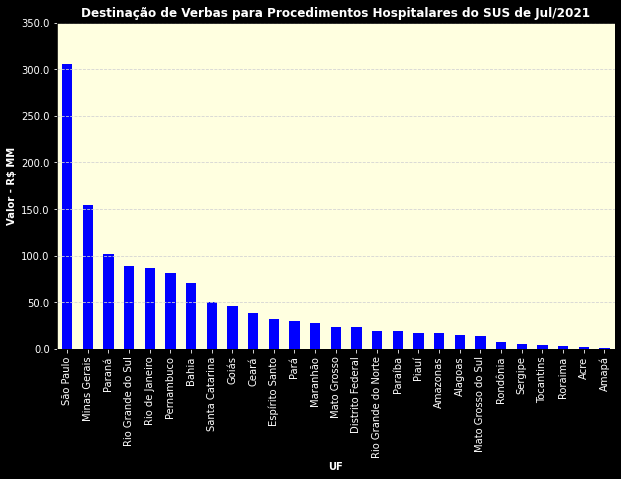

In [246]:
# Construindo grafico dos 5 estados com maior valor
ax = ultimoMes.plot(figsize=(10,6), kind="bar", legend=False, color ="b")
ax.set_facecolor("lightyellow")
# ajustando escala do eixo 
escalaY = 1e6
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/escalaY)))

ax.set_ylim(0, 350*escalaY) # definindo limites do eixo y
ax.yaxis.grid(color='lightgrey', linestyle="--") # incluindo a linha no eixo y
# definindo titulos do gráfico e dos exios
plt.ylabel("Valor - R$ MM", fontweight="bold", color="white")
plt.xlabel("UF", fontweight="bold", color="white")
plt.title("Destinação de Verbas para Procedimentos Hospitalares do SUS de Jul/2021", fontweight="bold", color="white")
plt.show()


In [247]:
# criando tabela de relação entre um estado e os demais
RelacaoDF = ultimoMes/ultimoMes.loc["Distrito Federal"]
RelacaoDF

,2021/Jul
Unidade da Federação,
São Paulo,13.21
Minas Gerais,6.67
Paraná,4.42
Rio Grande do Sul,3.85
Rio de Janeiro,3.75
Pernambuco,3.50
Bahia,3.04
Santa Catarina,2.15
Goiás,1.97


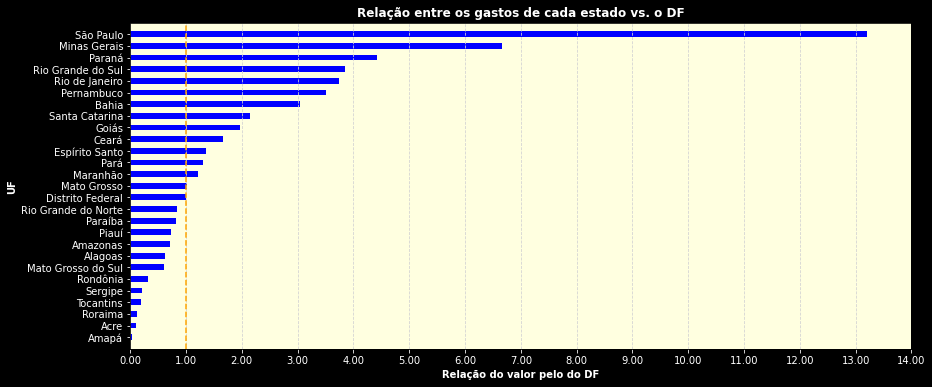

In [248]:
# Construindo grafico dos 5 estados com maior valor
ax = RelacaoDF.plot(figsize=(14,6), color="b", kind="barh", legend=False)
ax.set_facecolor("lightyellow")
ax.axvline(1, linestyle="--", color="orange", label="text")
# ajustando escala do eixo 
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x)))
ax.set_autoscaley_on(False)
ax.set_xlim(0, 14) # definindo limites do eixo y
ax.set_ylim(-1, 27) # definindo limites do eixo x
ax.xaxis.grid(color='lightgrey', linestyle="--") # incluindo a linha no eixo y
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.invert_yaxis()
# definindo titulos do gráfico e dos exios
plt.xlabel("Relação do valor pelo do DF", fontweight="bold", color="white")
plt.ylabel("UF", fontweight="bold", color="white")
plt.title("Relação entre os gastos de cada estado vs. o DF", fontweight="bold", color="white")
plt.show()

In [249]:
# pegando base de tamanho da população através de um excel
populacao = pd.read_excel("https://raw.githubusercontent.com/ViniciusCastillo/Aprendendo/master/POP2021_20211029.xls", skiprows=2, skipfooter=7)
populacao = populacao.rename(columns={"Brasil":"UF", 213317639:"valor"}) # alterando o nome das colunas
populacao = populacao.set_index("UF") # definindo o índice
# excluindo as linhas que não são UFs
Regioes = [i for i in populacao.index if "Região" in i] # selecionando as regiões
populacao = populacao.drop(index=Regioes, columns=["Unnamed: 1"]) # excluindo as regiões e a coluna que não tem informação relevante

populacao["valor_original"] = populacao["valor"] # criando uma cópia da coluna valor para tratamento
populacao.tail()

,valor,valor_original
UF,,
Rio Grande do Sul,11466630,11466630
Mato Grosso do Sul,2839188,2839188
Mato Grosso,3567234,3567234
Goiás,7.206.589(4),7.206.589(4)
Distrito Federal,3.094.325(4),3.094.325(4)


In [250]:
# transformando a coluna valor em valores de fato
populacao["valor"] = populacao["valor"].str.replace("(","{") # retirando o "(" para facilitar a troca
populacao["valor"] = populacao["valor"].str.replace(")","") # substituindo ")" por vazio
remover = ["{1","{2","{3","{4","{5"] # criando conjunto de valores a serem substituidos
for i in range(0, 5) :
  populacao["valor"] = populacao["valor"].str.replace(remover[i],"") # retirando os valores
populacao["valor"] = populacao["valor"].str.replace("\D","") # excluindo carcteres como "."
populacao["valor"] = populacao["valor"].fillna(populacao["valor_original"]) # adicionando os valores que ficaram vazios ao transformar em string
populacao["valor"] = pd.to_numeric(populacao["valor"], downcast="float") # transformando o campo em numérico
populacao.tail()

,valor,valor_original
UF,,
Rio Grande do Sul,"11,466,630.00",11466630
Mato Grosso do Sul,"2,839,188.00",2839188
Mato Grosso,"3,567,234.00",3567234
Goiás,"7,206,589.00",7.206.589(4)
Distrito Federal,"3,094,325.00",3.094.325(4)


In [251]:
# adicionando as informações na base do ultimo mes e calculando a relação
ultimoMes["populacao"] = populacao["valor"]
ultimoMes["R$/pessoa"] = ultimoMes["2021/Jul"]/ultimoMes["populacao"]
ultimoMes = ultimoMes.sort_values(by="R$/pessoa", ascending=False)
ultimoMes.head()

,2021/Jul,populacao,R$/pessoa
Unidade da Federação,,,
Paraná,"102,067,382.02","11,597,484.00",8.80
Pernambuco,"80,912,918.86","9,674,793.00",8.36
Rio Grande do Sul,"88,897,808.64","11,466,630.00",7.75
Espírito Santo,"31,538,501.89","4,108,508.00",7.68
Distrito Federal,"23,111,104.91","3,094,325.00",7.47


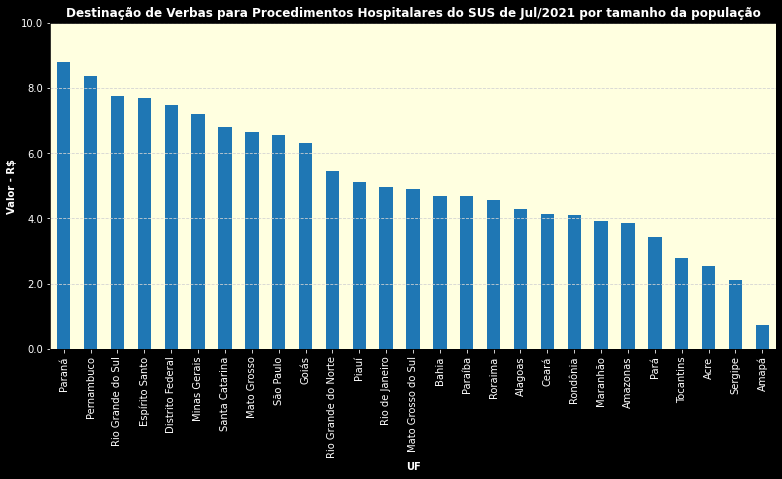

In [252]:
# configurando impressão dos gastos por pessoa
ax = ultimoMes.plot(y=["R$/pessoa"], kind="bar", figsize=(13,6), legend = False)
ax.set_facecolor("lightyellow")
# ajustando escala do eixo 
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x)))
ax.set_ylim(0, 10) # definindo limites do eixo y
ax.yaxis.grid(color='lightgrey', linestyle="--") # incluindo a linha no eixo y
# definindo titulos do gráfico e dos exios
plt.ylabel("Valor - R$", fontweight="bold", color="white")
plt.xlabel("UF", fontweight="bold", color="white")
plt.title("Destinação de Verbas para Procedimentos Hospitalares do SUS de Jul/2021 por tamanho da população", fontweight="bold", color="white")
plt.show()

In [253]:
# incluindo colunas da ordem de cada campo para avaliar as mudanças entre o gasto total e o gasto por pessoa
ultimoMes = ultimoMes.sort_values(by="R$/pessoa", ascending=False)
ultimoMes['ordem_por_pessoa'] = abs(ultimoMes.reset_index().index-27)
ultimoMes = ultimoMes.sort_values(by="2021/Jul", ascending=False)
ultimoMes['ordem_por_gasto'] = abs(ultimoMes.reset_index().index-27)
ultimoMes["ordem_gasto - ordem_pessoa"] = abs(ultimoMes['ordem_por_gasto']-ultimoMes['ordem_por_pessoa'])
ultimoMes.head()

,2021/Jul,populacao,R$/pessoa,ordem_por_pessoa,ordem_por_gasto,ordem_gasto - ordem_pessoa
Unidade da Federação,,,,,,
São Paulo,"305,314,678.98","46,649,132.00",6.54,19,27,8
Minas Gerais,"154,160,802.91","21,411,924.00",7.20,22,26,4
Paraná,"102,067,382.02","11,597,484.00",8.80,27,25,2
Rio Grande do Sul,"88,897,808.64","11,466,630.00",7.75,25,24,1
Rio de Janeiro,"86,682,141.36","17,463,348.00",4.96,15,23,8


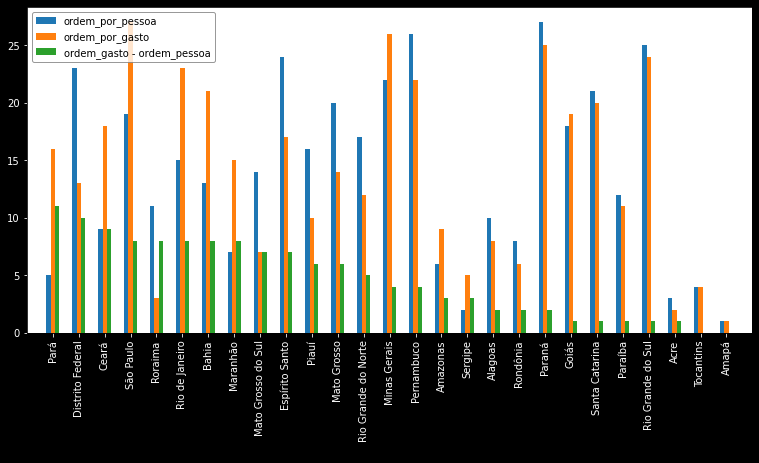

In [254]:
ultimoMes = ultimoMes.sort_values(by="ordem_gasto - ordem_pessoa", ascending=False)
ax = ultimoMes.plot(y=["ordem_por_pessoa", "ordem_por_gasto", "ordem_gasto - ordem_pessoa"], kind="bar", figsize=(13,6))
ax.set_xlim(-1, 27) # definindo limites do eixo x
plt.show()

In [255]:
ultimoMes.head(8)

,2021/Jul,populacao,R$/pessoa,ordem_por_pessoa,ordem_por_gasto,ordem_gasto - ordem_pessoa
Unidade da Federação,,,,,,
Pará,"30,176,865.99","8,777,124.00",3.44,5,16,11
Distrito Federal,"23,111,104.91","3,094,325.00",7.47,23,13,10
Ceará,"38,293,086.33","9,240,580.00",4.14,9,18,9
São Paulo,"305,314,678.98","46,649,132.00",6.54,19,27,8
Roraima,"2,977,820.70","652,713.00",4.56,11,3,8
Rio de Janeiro,"86,682,141.36","17,463,348.00",4.96,15,23,8
Bahia,"70,232,597.61","14,985,284.00",4.69,13,21,8
Maranhão,"28,076,854.43","7,153,262.00",3.93,7,15,8


In [256]:
ultimoMes.tail(8)

,2021/Jul,populacao,R$/pessoa,ordem_por_pessoa,ordem_por_gasto,ordem_gasto - ordem_pessoa
Unidade da Federação,,,,,,
Paraná,"102,067,382.02","11,597,484.00",8.80,27,25,2
Goiás,"45,518,873.74","7,206,589.00",6.32,18,19,1
Santa Catarina,"49,791,777.84","7,338,473.00",6.79,21,20,1
Paraíba,"18,959,325.80","4,059,905.00",4.67,12,11,1
Rio Grande do Sul,"88,897,808.64","11,466,630.00",7.75,25,24,1
Acre,"2,302,711.01","906,876.00",2.54,3,2,1
Tocantins,"4,466,982.19","1,607,363.00",2.78,4,4,0
Amapá,"632,906.09","877,613.00",0.72,1,1,0


# Avalições
Quando análisamos os gasto por pessoa por estado temos coisas que chama a atenção, por exemplo os 10 primeiros estatos com maior gasto por pessoa tem um valor acima de 6 reais por habitante, já os 7 últimos tem um valor abaixo de 4,00 reais. Isso demonstra uma diferenciação razoável no destino das verbas por estado que poderiam ser melhor analisadas. Se pegar o primeiro está que é o Parana recebeu 8,80 reais por habitante, já o último estado que é o Amapá recebeu para 0,72 reais por habitante, algo muito discrepante e que chama atenção e geram algumas perguntas, por exemplo:
1. As pessoas do Amapa utilizam menos os hospitais publicos por que tem acesso ao particular ou porque nem conseguem ter acesso ao hospital direito?
2. O Paraná as pessoas utilizam mais os hospitais públicos ou tem acessado tratamentos mais caros?

Outra avaliação pode ser por região, vemos que no Sul e Sudeste temos um custo maior por habitante que nas regiões norte e nordeste, exceçõa para Pernanbuco que tem o segundo maior gasto por habitante. Bom, mas porque isso acontece? Pode ser que na região sul e sudeste o mês de julho é inverno e aumento as internações? Será que um comportamento padrão e que realmente o destino da verba pública acaba vindo mais para essas regiões?

Temos diversas análises a serem feitas que seriam necessários mais dados. O que conseguimos constatar é que existe um desequilibrio que precisaria ser melhor entendido.